In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import networkx as nx

In [3]:
data = pd.read_csv("Pokemon.csv", sep = ",")
data.head()
data.tail()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True
799,721,Volcanion,Fire,Water,600,80,110,120,130,90,70,6,True


In [4]:
print(len(data.isnull().any()))
data.isnull().any()

13


#             False
Name          False
Type 1        False
Type 2         True
Total         False
HP            False
Attack        False
Defense       False
Sp. Atk       False
Sp. Def       False
Speed         False
Generation    False
Legendary     False
dtype: bool

In [6]:
data["Type 2"].replace(np.nan, "0", inplace = True)
data["Type 2"].head(10)

0    Poison
1    Poison
2    Poison
3    Poison
4         0
5         0
6    Flying
7    Dragon
8    Flying
9         0
Name: Type 2, dtype: object

In [7]:
print("Number of pokemon are :" + str(data["Name"].nunique()))
name = pd.DataFrame(data["Name"].unique().tolist(), columns = ["Pokemon"])

Number of pokemon are :800


In [8]:
npoke_total = data.copy()
print(npoke_total.columns)
npoke_total = pd.concat([npoke_total["Name"], data["Total"]], axis = 1)

Index(['#', 'Name', 'Type 1', 'Type 2', 'Total', 'HP', 'Attack', 'Defense',
       'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary'],
      dtype='object')


In [9]:
npoke_total

,Name,Total
0,Bulbasaur,318
1,Ivysaur,405
2,Venusaur,525
3,VenusaurMega Venusaur,625
4,Charmander,309
...,...,...
795,Diancie,600
796,DiancieMega Diancie,700
797,HoopaHoopa Confined,600
798,HoopaHoopa Unbound,680


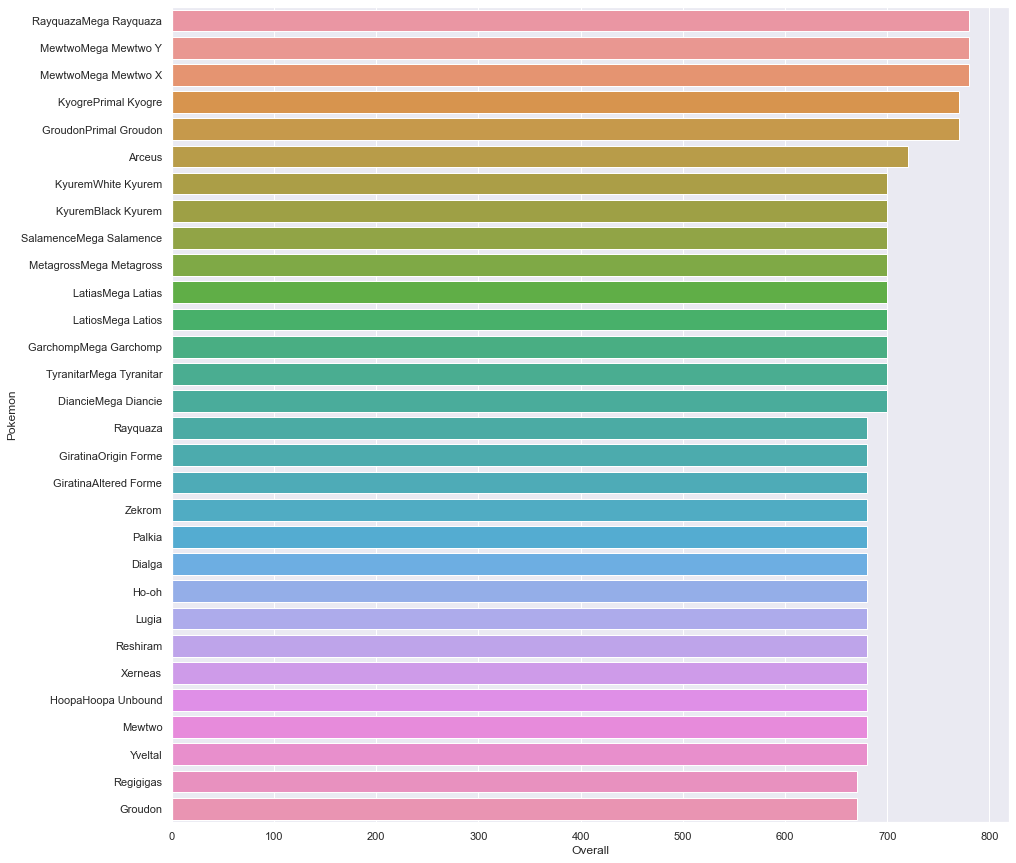

In [18]:
sns.set()
plt.figure(figsize = (15, 15))
ax = sns.barplot(x = "Total", y = "Name", data = npoke_total.sort_values(by = "Total", ascending = False).head(30))
ax.set(xlabel = "Overall", ylabel = "Pokemon")
plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_12732\3812701342.py:3: DeprecationWarning: info is deprecated and will be removed in version 3.0.

  print(nx.info(g))


Graph with 818 nodes and 800 edges


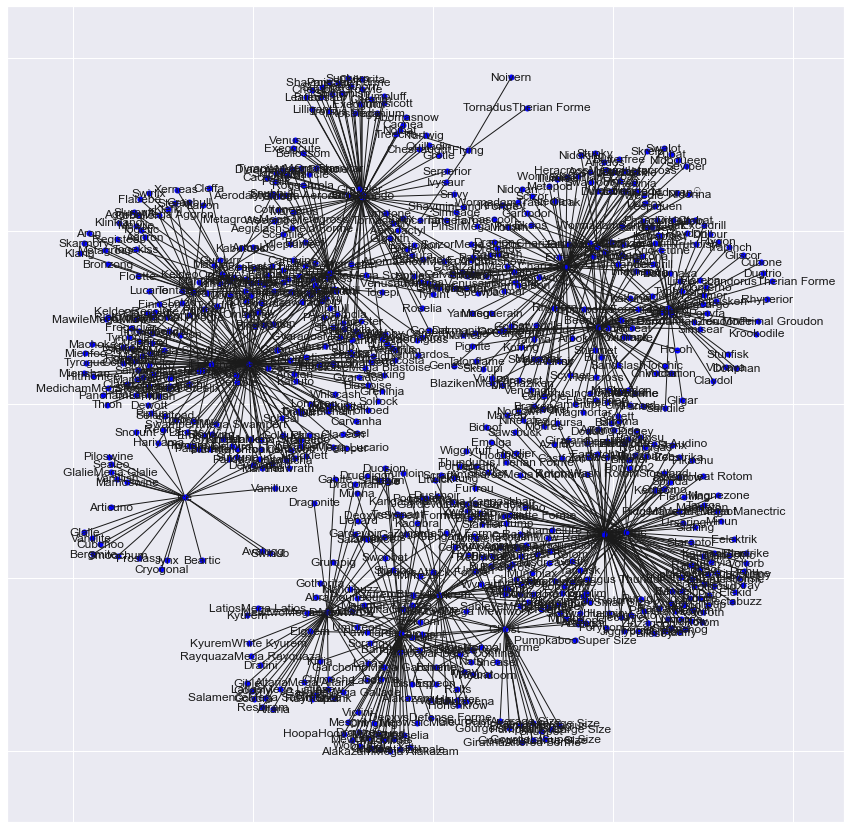

In [17]:
g = nx.Graph()
g = nx.from_pandas_edgelist(data, source = "Name", target = "Type 1")
print(nx.info(g))

plt.figure(figsize = (15, 15))
pos = nx.spring_layout(g, k = 0.15)
nx.draw_networkx(g, pos, node_size = 25, node_color = "blue")
plt.show()

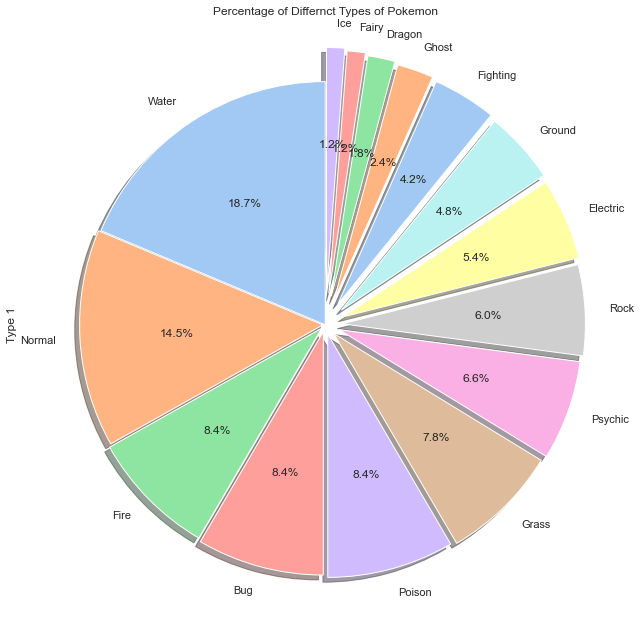

In [28]:
gen1 = data[data.Generation == 1]
types = gen1["Type 1"]
explode = np.arange(len(types.unique())) * 0.01

colors = sns.color_palette("pastel")
types.value_counts().plot.pie(
    explode = explode,
    colors = colors,
    title = "Percentage of Differnct Types of Pokemon",
    autopct = '%1.1f%%',
    shadow = True,
    startangle = 90,
    figsize = (9, 9)
)
plt.tight_layout()
plt.show()

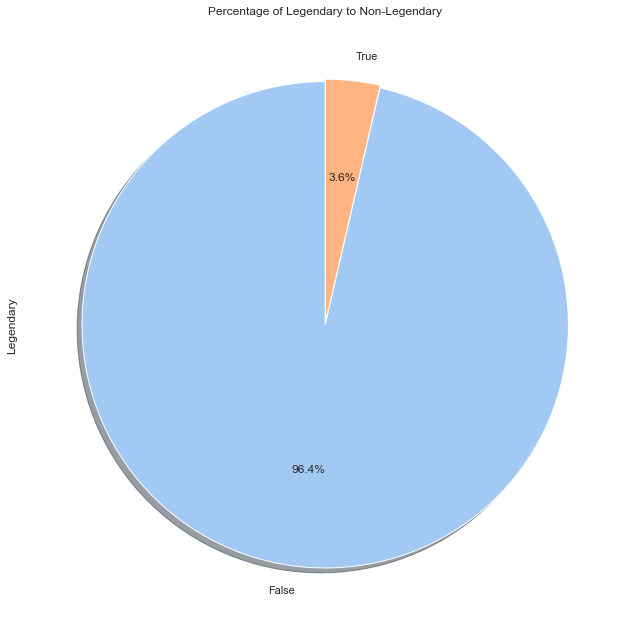

In [30]:
types = gen1["Legendary"]
explode = np.arange(len(types.unique())) * 0.01
colors = sns.color_palette("pastel")

types.value_counts().plot.pie(
    explode = explode,
    colors = colors,
    title = "Percentage of Legendary to Non-Legendary",
    autopct = '%1.1f%%',
    shadow = True,
    startangle = 90,
    figsize = (9, 9)
)
plt.tight_layout()
plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_12732\2617817291.py:2: DeprecationWarning: info is deprecated and will be removed in version 3.0.

  print(nx.info(g))


Graph with 181 nodes and 166 edges


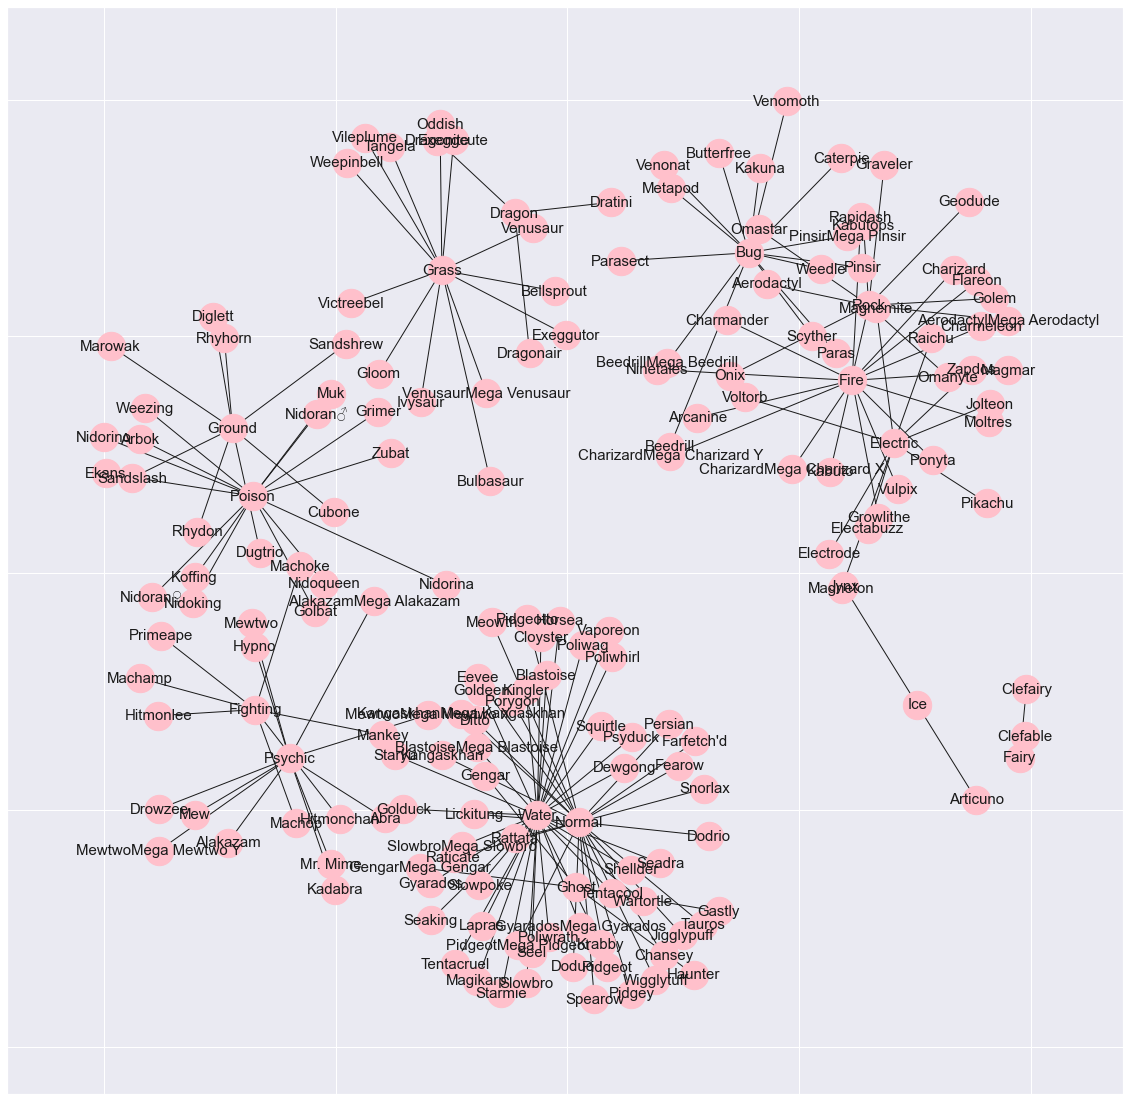

In [39]:
g = nx.from_pandas_edgelist(gen1,source='Name',target='Type 1')
print(nx.info(g))
nx.Graph()
plt.figure(figsize=(20, 20))
pos=nx.spring_layout(g, k=0.25)
nx.draw_networkx(g,pos,node_size=805, node_color='pink', font_size=15)
plt.show()